# Instacart Customer Analysis

# 0. Data Preparation

In [45]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import seaborn as sns
from pandas.plotting import table

In [22]:
# setting view options 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
# importing dataset
insta_df = pd.read_pickle('/Volumes/external_drive/Instacart/Data/Prepared Data/final_df.pkl')

In [24]:
insta_df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,department,aisle,gender,state,age,date_joined,n_dependants,fam_status,income,busiest_days,busiest_period_of_day,price_range,max_order,loyalty_flag,avg_order,spending_flag,median_days_prior_order,frequency_flag,region,age_group,income_tier,family_profile,meat_seafood_flag
0,2539329,1,1,2,8,NaN,196,Soda,77,7,9.0,beverages,soft drinks,Female,Alabama,31,2/17/2019,3,married,40423,regular day,fewest orders,mid-range product,10,NaN,6.37,low spender,20.5,non-frequent customer,south,25-34,lower-income,"married, children",non-meat/seafood buyer
1,2398795,1,2,3,7,15.0,196,Soda,77,7,9.0,beverages,soft drinks,Female,Alabama,31,2/17/2019,3,married,40423,slowest days,fewest orders,mid-range product,10,NaN,6.37,low spender,20.5,non-frequent customer,south,25-34,lower-income,"married, children",non-meat/seafood buyer
2,473747,1,3,3,12,21.0,196,Soda,77,7,9.0,beverages,soft drinks,Female,Alabama,31,2/17/2019,3,married,40423,slowest days,most orders,mid-range product,10,NaN,6.37,low spender,20.5,non-frequent customer,south,25-34,lower-income,"married, children",non-meat/seafood buyer
3,2254736,1,4,4,7,29.0,196,Soda,77,7,9.0,beverages,soft drinks,Female,Alabama,31,2/17/2019,3,married,40423,slowest days,fewest orders,mid-range product,10,NaN,6.37,low spender,20.5,non-frequent customer,south,25-34,lower-income,"married, children",non-meat/seafood buyer
4,431534,1,5,4,15,28.0,196,Soda,77,7,9.0,beverages,soft drinks,Female,Alabama,31,2/17/2019,3,married,40423,slowest days,most orders,mid-range product,10,NaN,6.37,low spender,20.5,non-frequent customer,south,25-34,lower-income,"married, children",non-meat/seafood buyer


In [25]:
# grouping order_id's together to get a better insight into order numbers and total order value
grouped_df = insta_df.groupby('order_id').agg({
    'user_id': 'first',
    'region': 'first',
    'age_group': 'first',
    'income_tier': 'first',
    'family_profile': 'first',
    'frequency_flag': 'first',
    'loyalty_flag': 'first',
    'order_dow': 'first',
    'order_hour_of_day': 'first',
    'state': 'first',
    'prices': 'sum'
}).reset_index()

In [26]:
grouped_df.head()

,order_id,user_id,region,age_group,income_tier,family_profile,frequency_flag,loyalty_flag,order_dow,order_hour_of_day,state,prices
0,2,202279,west,55-64,middle-income,"married, children",non-frequent customer,new customer,5,9,Idaho,91.6
1,3,205970,west,35-44,upper-income,"married, children",frequent customer,regular customer,5,17,Oregon,70.3
2,4,178520,northeast,65+,middle-income,"married, children",frequent customer,loyal customer,1,9,Maine,92.8
3,5,156122,south,35-44,middle-income,"married, children",frequent customer,loyal customer,6,16,Georgia,210.7
4,6,22352,midwest,25-34,middle-income,"married, children",non-frequent customer,new customer,1,12,Illinois,27.5


# 1. Overview

### A. Age Group Overview

65+      854313
45-54    508269
35-44    501299
55-64    499084
25-34    498878
18-24    352841
Name: age_group, dtype: int64


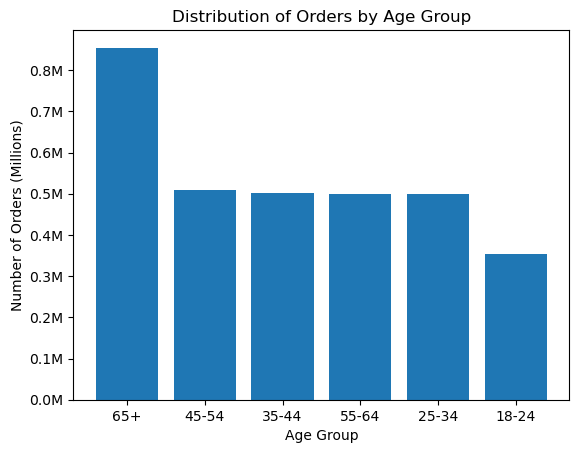

In [29]:
# creating a distribution of orders by age group
age_group_bar = grouped_df['age_group'].value_counts() / 1e6
plt.bar(age_group_bar.index, age_group_bar.values, align='center')
formatter = mticker.FuncFormatter(lambda x, pos: f'{x:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Age Group')
plt.ylabel('Number of Orders (Millions)')
plt.title('Distribution of Orders by Age Group')
plt.savefig('/Volumes/external_drive/Instacart/Analysis/age_distribution.png', dpi=300)
print(grouped_df['age_group'].value_counts())
plt.show()

Customers 65+ years old account for 27% of orders and is the largest age group by order count, customers aged 18-24 account for the least amount of orders at just 11%.

### B. Income Tier Overview

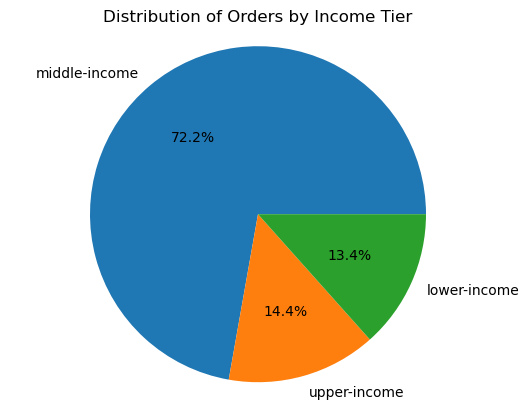

In [8]:
# creating a distribution of orders by income tier
income_pie = grouped_df['income_tier'].value_counts()
plt.pie(income_pie.values, labels=income_pie.index, autopct='%1.1f%%')
plt.title('Distribution of Orders by Income Tier')
plt.axis('equal')
plt.savefig('/Volumes/external_drive/Instacart/Analysis/income_distribution.png', dpi=300)
plt.show()

Middle-income customers overwhelmingly account for the majority of orders with 72%.

### C. Family Profile Overview

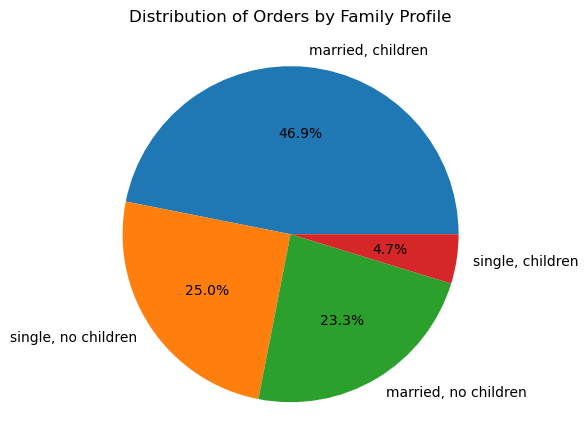

In [9]:
# creating a distribution of orders by family profile
family_pie = grouped_df['family_profile'].value_counts()
plt.pie(family_pie.values, labels=family_pie.index, autopct='%1.1f%%')
plt.title('Distribution of Orders by Family Profile', pad=20) 
plt.axis('equal') 
plt.savefig('/Volumes/external_drive/Instacart/Analysis/family_distribution.png', dpi=300)
plt.show()

Married customers with children account for 47% of orders, customers without children (married or single) account for similar percentage and make up the 48% of orders. Single customers with children account for just 4.7% of orders.

### D. Region Overview

south        1071561
west          821686
midwest       754275
northeast     567162
Name: region, dtype: int64


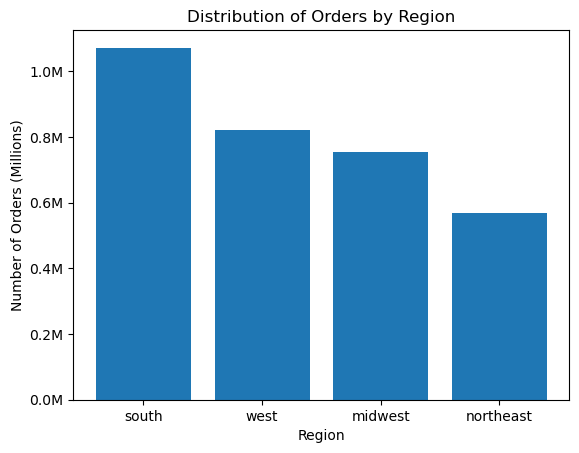

In [30]:
# creating a distribution of orders by region
region_bar = grouped_df['region'].value_counts() / 1e6
plt.bar(region_bar.index, region_bar.values, align='center')
formatter = mticker.FuncFormatter(lambda x, pos: f'{x:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel('Region')
plt.ylabel('Number of Orders (Millions)')
plt.title('Distribution of Orders by Region')
plt.savefig('/Volumes/external_drive/Instacart/Analysis/region_distribution.png', dpi=300)
print(grouped_df['region'].value_counts())
plt.show()

The South accounts for the majority of orders with 33% of orders, the Northeast accounts for the least with just 17% of orders.

### E. Department Overview

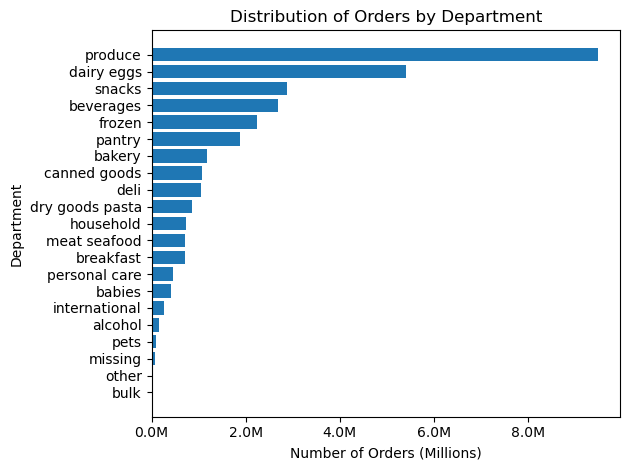

In [11]:
# creating a distribution of orders by department
dep_bar = insta_df['department'].value_counts() / 1e6
dep_bar = dep_bar.sort_values(ascending=True) 
fig, ax = plt.subplots()
ax.barh(dep_bar.index, dep_bar.values, align='center')
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Department')
ax.set_title('Distribution of Orders by Department')
formatter = mticker.FuncFormatter(lambda x, pos: f'{x:.1f}M')
ax.xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('/Volumes/external_drive/Instacart/Analysis/dep_distribution.png', dpi=300)
plt.show()

Produce accounts for the majaority of departement orders, this likely due to produce consisting largely of perishable goods that need to be purchased frequently.

### F. Aisle Overview

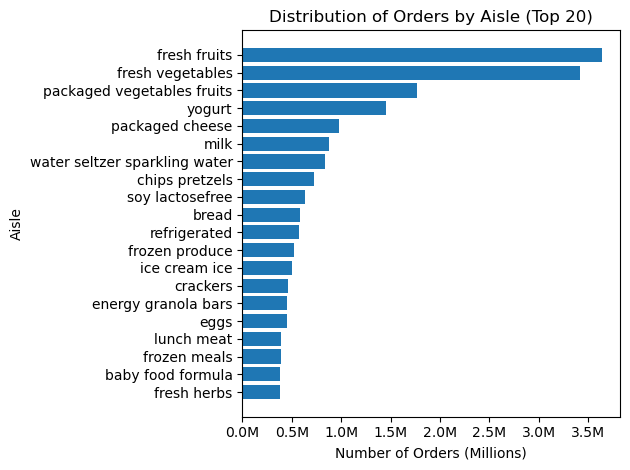

In [12]:
# creating a distribution of orders by aisle (only showing the Top 20)
aisle_bar = insta_df['aisle'].value_counts() / 1e6
aisle_bar = aisle_bar.sort_values(ascending=True)
top_n = 20
top_aisles = aisle_bar.tail(top_n)
fig, ax = plt.subplots()
ax.barh(top_aisles.index, top_aisles.values, align='center')
ax.set_xlabel('Number of Orders (Millions)')
ax.set_ylabel('Aisle')
ax.set_title(f'Distribution of Orders by Aisle (Top {top_n})')
formatter = mticker.FuncFormatter(lambda x, pos: f'{x:.1f}M')
ax.xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.savefig('/Volumes/external_drive/Instacart/Analysis/aisle_distribution.png', dpi=300)
plt.show()

Fruits and vegetables account for the majority of orders, with dairy products also accounting for a large portion.

### G. Loyalty Overview

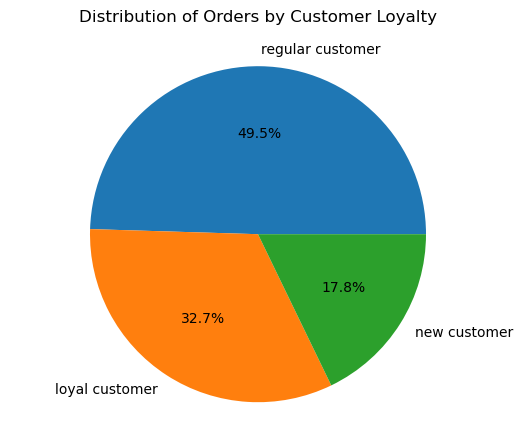

In [31]:
# creating a distribution of orders by family profile
loyalty_pie = grouped_df['loyalty_flag'].value_counts()
plt.pie(loyalty_pie.values, labels=loyalty_pie.index, autopct='%1.1f%%')
plt.title('Distribution of Orders by Customer Loyalty', pad=20) 
plt.axis('equal') 
plt.savefig('/Volumes/external_drive/Instacart/Analysis/loyalty_distribution.png', dpi=300)
plt.show()

Regular customers acount for the majority of orders with 50%, loyal customers account for 33% and new customers just 18%.

### H. State Overview

In [34]:
# Define a dictionary to map full state names to abbreviations
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Apply the state abbreviation mapping to the 'state' column
grouped_df['state_abbr'] = grouped_df['state'].map(state_abbreviations)

# Calculate state counts using the abbreviated column
state_counts = grouped_df['state_abbr'].value_counts().reset_index()
state_counts.columns = ['state_abbr', 'order_count']

# Create the choropleth map using the abbreviated state names
fig = px.choropleth(
    state_counts,
    locations='state_abbr',
    locationmode='USA-states',
    color='order_count',
    scope='usa',
    title='Order Count by State',
    labels={'order_count': 'Order Count'}
)
plt.savefig('/Volumes/external_drive/Instacart/Analysis/state_distribution.png', dpi=300)
print(grouped_df['state'].value_counts().reset_index())
fig.show()

                   index  state
0           Pennsylvania  65170
1             New Mexico  65001
2                Alabama  64615
3             California  64562
4                Georgia  64489
5         North Carolina  64202
6               Oklahoma  64130
7              Minnesota  64091
8               Colorado  64065
9               Missouri  63940
10                 Maine  63880
11                 Texas  63848
12               Wyoming  63699
13            Washington  63671
14                Alaska  63638
15               Arizona  63633
16               Florida  63613
17         Massachusetts  63566
18                Kansas  63510
19               Montana  63443
20              Delaware  63261
21          South Dakota  63249
22          Rhode Island  63075
23              Virginia  63039
24             Wisconsin  62916
25                Oregon  62892
26                Hawaii  62887
27           Connecticut  62885
28          North Dakota  62764
29              Kentucky  62618
30      

<Figure size 640x480 with 0 Axes>

Suprisingly, there is a fairly even distribution of orders amongst the different state. There is roughly a 5000 order difference between the state with the most orders (PA) and the state with the least order (ID).

# 2. Basket  Price Analysis

### A. Income Tier Basket Price Analysis

In [122]:
# mean, min, max basket value for income tiers
grouped_df.groupby('income_tier').agg({'prices': ['mean', 'max', 'min']})

prices             
                    mean     max  min
income_tier                          
lower-income   52.119365   875.0  1.0
middle-income  82.375839  1092.2  1.0
upper-income   83.934761  1047.4  1.0

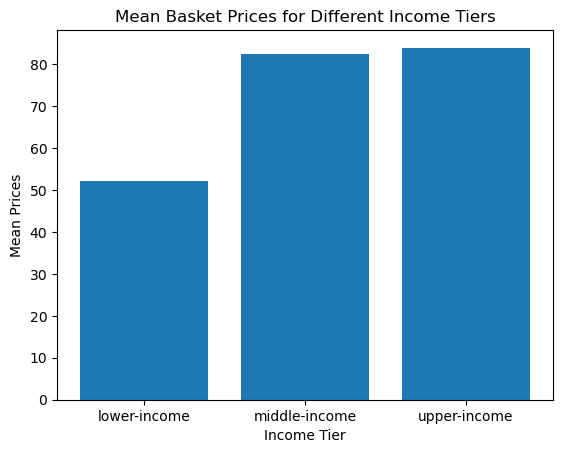

In [194]:
# creating bar graph for mean values
income_tier_stats = grouped_df.groupby('income_tier').agg({'prices': 'mean'})
plt.figure()
plt.bar(income_tier_stats.index, income_tier_stats['prices'], align='center')
plt.xlabel('Income Tier')
plt.ylabel('Mean Prices')
plt.title('Mean Basket Prices for Different Income Tiers')
plt.xticks(rotation=0)
plt.savefig('/Volumes/external_drive/Instacart/Analysis/income_tier_stats.png', dpi=300)
plt.show()

On average, middle and upper income customers spend around 58% more per order than lower income customers. There is no significant difference in the order price between upper and middle income customers.

### B. Family Profile Basket Price Analysis

In [121]:
# mean, min, max basket value for family profiles
grouped_df.groupby('family_profile').agg({'prices': ['mean', 'max', 'min']})

prices             
                           mean     max  min
family_profile                              
married, children     78.588788  1092.2  1.0
married, no children  78.526571   852.5  1.0
single, children      79.260516   750.3  1.0
single, no children   78.346685   875.0  1.0

There is no significant difference in basket prices between the different family profiles.

### C. Age Group Basket Price Analysis

In [131]:
# mean, min, max basket value for age groups
grouped_df.groupby('age_group').agg({'prices': ['mean', 'max', 'min']})

prices             
                mean     max  min
age_group                        
18-24      78.904548   842.1  1.0
25-34      78.858091   718.6  1.0
35-44      78.719699   829.2  1.0
45-54      78.331589  1047.4  1.0
55-64      78.498631  1092.2  1.0
65+        78.267200   787.0  1.0

There is no significant difference in basket prices between the different age groups.

### D. Meat/Seafood Basket Price Analysis

In [125]:
# mean, min, max basket value for meat/seafood flag
grouped_df.groupby('meat_seafood_flag').agg({'prices': ['mean', 'max', 'min']})

prices             
                             mean     max  min
meat_seafood_flag                             
meat/seafood buyer      89.302100  1092.2  1.0
non-meat/seafood buyer  58.169525   775.7  1.0

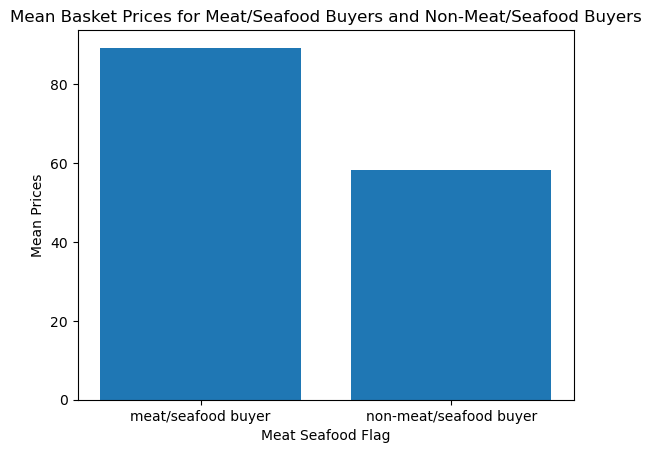

In [204]:
# creating bar graph for mean values
meat_stats = grouped_df.groupby('meat_seafood_flag').agg({'prices': 'mean'})
plt.figure()
plt.bar(meat_stats.index, meat_stats['prices'], align='center')
plt.xlabel('Meat Seafood Flag')
plt.ylabel('Mean Prices')
plt.title('Mean Basket Prices for Meat/Seafood Buyers and Non-Meat/Seafood Buyers')
plt.xticks(rotation=0)
plt.savefig('/Volumes/external_drive/Instacart/Analysis/meat_stats.png', dpi=300)
plt.show()

On average, meat/seafood buyers spend 53% more per order than non-meat/seafood buyers.

### E. Region Basket Price Analysis

In [207]:
# mean, min, max basket value for meat/seafood flag
grouped_df.groupby('region').agg({'prices': ['mean', 'max', 'min']})

prices             
                mean     max  min
region                           
midwest    78.500118   751.1  1.0
northeast  78.535164  1092.2  1.0
south      78.514734   875.0  1.0
west       78.634521   852.5  1.0

There is no significant difference in basket prices between the different regions.

### F. Loyalty Basket Price Analysis

In [14]:
# mean, min, max basket value for loyalty flag
grouped_df.groupby('loyalty_flag').agg({'prices': ['mean', 'max', 'min']})

prices             
                       mean     max  min
loyalty_flag                            
loyal customer    78.039930   875.0  1.0
new customer      76.360590   829.2  1.0
regular customer  79.728568  1092.2  1.0

There is no significant difference in basket prices and customer loyalty.

# 3. Frequency Analysis

### A. Income Tier Frequency Analysis

In [225]:
# mean, min, max frequency for income tiers
insta_df.groupby('income_tier').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                mean   max  min
income_tier                                    
lower-income               11.607573  30.0  0.0
middle-income              11.062062  30.0  0.0
upper-income               10.968832  30.0  0.0

There is no sgnificant difference in the frequency of orders between the different age groups.

### B. Family Profile Frequency Analysis

In [226]:
# mean, min, max frequency for family profiles
insta_df.groupby('family_profile').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                       mean   max  min
family_profile                                        
married, children                 11.117681  30.0  0.0
married, no children              11.113141  30.0  0.0
single, children                  11.048170  30.0  0.0
single, no children               11.080805  30.0  0.0

There is no sgnificant difference in the frequency of orders between the different family profiles.

### C. Age Group Frequency Analysis

In [227]:
# mean, min, max frequency for age groups
insta_df.groupby('age_group').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                            mean   max  min
age_group                                  
18-24                  11.057388  30.0  0.0
25-34                  11.165556  30.0  0.0
35-44                  11.084533  30.0  0.0
45-54                  11.092368  30.0  0.0
55-64                  11.150466  30.0  0.0
65+                    11.078641  30.0  0.0

There is no sgnificant difference in the frequency of orders between the different age groups.

### D. Meat/Seafood Buyer Frequency Analysis

In [228]:
# mean, min, max frequency for meat/seafood buyers
insta_df.groupby('meat_seafood_flag').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                         mean   max  min
meat_seafood_flag                                       
meat/seafood buyer                  10.762605  30.0  0.0
non-meat/seafood buyer              12.071076  30.0  0.0

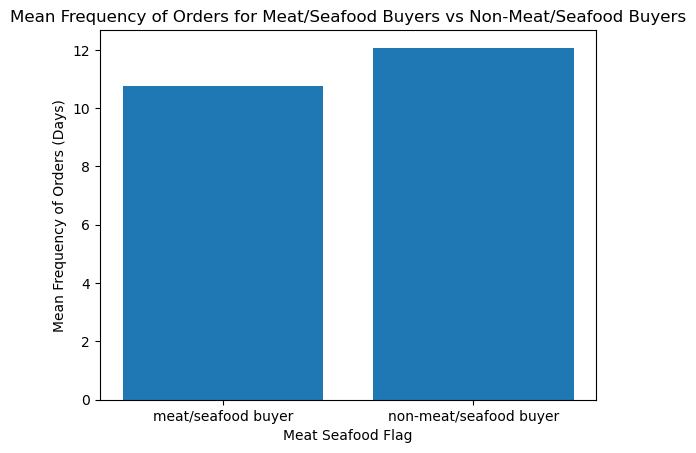

In [234]:
# creating bar graph for mean values
meatseafood_stats = insta_df.groupby('meat_seafood_flag').agg({'days_since_prior_order': 'mean'})
plt.figure()
plt.bar(meatseafood_stats.index, meatseafood_stats['days_since_prior_order'], align='center')
plt.xlabel('Meat Seafood Flag')
plt.ylabel('Mean Frequency of Orders (Days)')
plt.title('Mean Frequency of Orders for Meat/Seafood Buyers vs Non-Meat/Seafood Buyers')
plt.xticks(rotation=0)
plt.savefig('/Volumes/external_drive/Instacart/Analysis/meatseafood_frequency.png', dpi=300)
plt.show()

Meat/seafood buyers order more frequently than non-meat/seafood buyers.

### C. Region Frequency Analysis

In [269]:
# mean, min, max frequency for meat/seafood buyers
insta_df.groupby('region').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                            mean   max  min
region                                     
midwest                11.181836  30.0  0.0
northeast              11.075769  30.0  0.0
south                  11.108108  30.0  0.0
west                   11.047196  30.0  0.0

There is no sgnificant difference in the frequency of orders between the different regions.

### D. Loyalty Frequency Analysis

In [15]:
# mean, min, max frequency for meat/seafood buyers
insta_df.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                   mean   max  min
loyalty_flag                                      
loyal customer                 6.026656  30.0  0.0
new customer                  18.199585  30.0  0.0
regular customer              12.155135  30.0  0.0

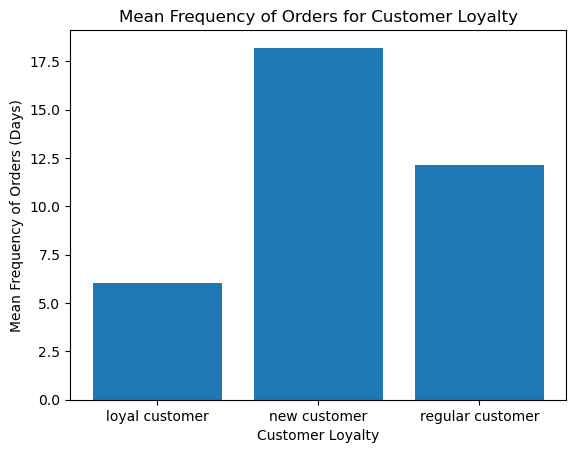

In [35]:
# creating bar graph for mean values
loyalty_stats = insta_df.groupby('loyalty_flag').agg({'days_since_prior_order': 'mean'})
plt.figure()
plt.bar(loyalty_stats.index, loyalty_stats['days_since_prior_order'], align='center')
plt.xlabel('Customer Loyalty')
plt.ylabel('Mean Frequency of Orders (Days)')
plt.title('Mean Frequency of Orders for Customer Loyalty')
plt.xticks(rotation=0)
plt.savefig('/Volumes/external_drive/Instacart/Analysis/loyalty_frequency.png', dpi=300)
plt.show()

Loyal customers order every 6 days on average, where as new and regular customers respectivley only order every 18 and every 12 days.

# 4. Composition Analysis

### A. Income Tier Composition

In [51]:
# which departments contribute the most and the least to the total value of purchases within each income tier.

income_cross_tab = pd.crosstab(insta_df['income_tier'], insta_df['department'], values=insta_df['prices'], aggfunc='sum', normalize='index') * 100
income_cross_tab = income_cross_tab.round(2).astype(str) + '%'
income_cross_tab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_tier,,,,,,,,,,,,,,,,,,,,,
lower-income,0.58%,0.89%,3.38%,11.35%,2.91%,0.15%,2.52%,16.12%,3.26%,1.98%,6.83%,2.71%,0.68%,2.29%,0.24%,0.11%,5.55%,1.61%,0.27%,26.14%,10.43%
middle-income,0.46%,1.32%,3.66%,7.85%,2.16%,0.11%,3.25%,17.99%,3.24%,2.58%,6.83%,2.08%,0.83%,4.79%,0.24%,0.1%,5.98%,1.4%,0.3%,30.45%,4.38%
upper-income,0.61%,1.32%,3.75%,7.94%,2.2%,0.1%,3.27%,18.05%,3.21%,2.56%,6.96%,2.24%,0.83%,4.86%,0.24%,0.11%,6.02%,1.41%,0.33%,29.78%,4.21%


Notably, snacks and beverages account for a larger portion of sales for lower-income customers. Snacks account for 10% of spend for lower-income customers and only 4% of spend for middle and upper-income customers. Beverages account for 11% of spend for lower-income customers and only 8% of spend for middle and upper-income customers

### B. Family Profile Composition

In [50]:
# which departments contribute the most and the least to the total value of purchases within each family profile.

family_cross_tab = pd.crosstab(insta_df['family_profile'], insta_df['department'], values=insta_df['prices'], aggfunc='sum', normalize='index') * 100
family_cross_tab = family_cross_tab.round(2).astype(str) + '%'
family_cross_tab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_profile,,,,,,,,,,,,,,,,,,,,,
"married, children",0.49%,1.3%,3.63%,8.19%,2.22%,0.11%,3.2%,17.77%,3.23%,2.53%,6.87%,2.18%,0.81%,4.61%,0.24%,0.1%,5.95%,1.41%,0.3%,29.96%,4.9%
"married, no children",0.49%,1.24%,3.66%,8.17%,2.26%,0.12%,3.2%,17.9%,3.21%,2.52%,6.81%,2.18%,0.83%,4.6%,0.24%,0.1%,5.97%,1.42%,0.3%,29.89%,4.89%
"single, children",0.61%,1.29%,3.67%,7.92%,2.3%,0.12%,3.18%,18.01%,3.25%,2.54%,6.9%,2.15%,0.81%,4.57%,0.25%,0.11%,5.98%,1.4%,0.37%,29.74%,4.84%
"single, no children",0.5%,1.28%,3.65%,8.2%,2.23%,0.11%,3.16%,17.86%,3.28%,2.51%,6.84%,2.11%,0.82%,4.49%,0.24%,0.1%,5.93%,1.42%,0.31%,30.09%,4.88%


There is no significant difference in the department composition of orders for the different family profiles.

### C. Age Group Composition

In [49]:
# which departments contribute the most and the least to the total value of purchases within each age group.

age_cross_tab = pd.crosstab(insta_df['age_group'], insta_df['department'], values=insta_df['prices'], aggfunc='sum', normalize='index') * 100
age_cross_tab = age_cross_tab.round(2).astype(str) + '%'
age_cross_tab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_group,,,,,,,,,,,,,,,,,,,,,
18-24,0.54%,1.31%,3.66%,8.04%,2.27%,0.12%,3.19%,17.91%,3.21%,2.55%,6.84%,2.15%,0.81%,4.61%,0.25%,0.1%,5.94%,1.4%,0.34%,29.9%,4.87%
25-34,0.5%,1.24%,3.65%,8.15%,2.25%,0.12%,3.22%,17.96%,3.23%,2.52%,6.79%,2.12%,0.84%,4.52%,0.24%,0.1%,5.96%,1.41%,0.3%,29.93%,4.95%
35-44,0.47%,1.34%,3.64%,8.06%,2.21%,0.12%,3.19%,17.86%,3.27%,2.52%,6.81%,2.19%,0.82%,4.55%,0.23%,0.1%,5.91%,1.42%,0.3%,30.15%,4.86%
45-54,0.52%,1.32%,3.64%,8.25%,2.26%,0.11%,3.18%,17.79%,3.21%,2.53%,6.92%,2.16%,0.82%,4.54%,0.25%,0.1%,5.96%,1.44%,0.28%,29.8%,4.9%
55-64,0.49%,1.25%,3.65%,8.27%,2.25%,0.11%,3.18%,17.71%,3.28%,2.53%,6.86%,2.16%,0.81%,4.57%,0.23%,0.1%,5.97%,1.44%,0.3%,29.95%,4.9%
65+,0.48%,1.25%,3.64%,8.22%,2.2%,0.12%,3.19%,17.81%,3.23%,2.51%,6.86%,2.17%,0.82%,4.63%,0.24%,0.1%,5.95%,1.41%,0.31%,30.01%,4.86%


There is no significant difference in the department composition of orders for the different age groups.

### D. Meat/Seafood Buyer Composition

In [48]:
# which departments contribute the most and the least to the total value of purchases for meat/seafood buyers.

meat_cross_tab = pd.crosstab(insta_df['meat_seafood_flag'], insta_df['department'], values=insta_df['prices'], aggfunc='sum', normalize='index') * 100
meat_cross_tab = meat_cross_tab.round(2).astype(str) + '%'
meat_cross_tab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
meat_seafood_flag,,,,,,,,,,,,,,,,,,,,,
meat/seafood buyer,0.36%,1.4%,3.73%,6.97%,2.05%,0.1%,3.38%,17.59%,3.23%,2.72%,6.85%,1.92%,0.85%,6.15%,0.23%,0.09%,6.02%,1.27%,0.3%,30.49%,4.31%
non-meat/seafood buyer,0.9%,0.95%,3.42%,11.69%,2.78%,0.15%,2.63%,18.54%,3.25%,1.96%,6.83%,2.85%,0.74%,0.0%,0.26%,0.13%,5.73%,1.85%,0.32%,28.45%,6.58%


Beverages account for a larger portion of customer spend for non-meat/seafood buyers. Beverages account for 12% of customer spend for non-meat/seafood buyers and only 7% for meat/seafood buyers.

### D. Region Composition

In [52]:
# which departments contribute the most and the least to the total value of purchases for meat/seafood buyers.

region_cross_tab = pd.crosstab(insta_df['region'], insta_df['department'], values=insta_df['prices'], aggfunc='sum', normalize='index') * 100
region_cross_tab = region_cross_tab.round(2).astype(str) + '%'
region_cross_tab

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
midwest,0.5%,1.27%,3.64%,8.12%,2.22%,0.12%,3.19%,17.81%,3.24%,2.54%,6.84%,2.19%,0.82%,4.56%,0.24%,0.1%,5.98%,1.43%,0.3%,30.04%,4.86%
northeast,0.48%,1.29%,3.68%,8.34%,2.22%,0.11%,3.15%,17.87%,3.26%,2.5%,6.79%,2.18%,0.81%,4.55%,0.24%,0.1%,5.92%,1.41%,0.33%,29.84%,4.93%
south,0.5%,1.31%,3.63%,8.21%,2.24%,0.11%,3.2%,17.8%,3.23%,2.51%,6.89%,2.14%,0.82%,4.57%,0.24%,0.1%,5.93%,1.43%,0.29%,29.99%,4.86%
west,0.5%,1.25%,3.66%,8.07%,2.26%,0.12%,3.2%,17.87%,3.24%,2.54%,6.85%,2.15%,0.82%,4.6%,0.23%,0.1%,5.97%,1.39%,0.31%,29.95%,4.91%


There is no significant difference in the department composition of orders for the different regions.

# 4. Order Time Analysis

### A. Day of Week

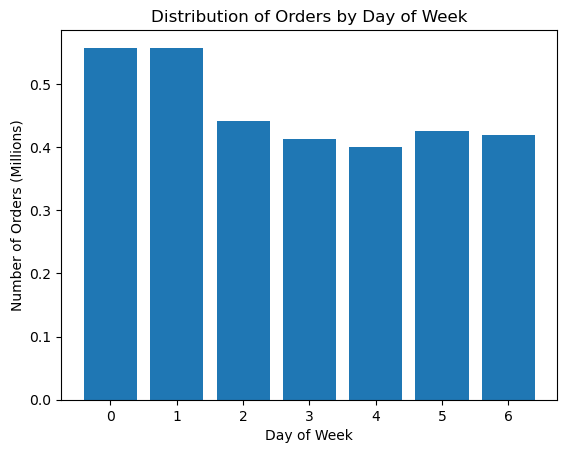

In [311]:
# bar chart for number of orders per day of week
order_dow_counts = grouped_df['order_dow'].value_counts() / 1e6
plt.bar(order_dow_counts.index, order_dow_counts.values, align='center')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders (Millions)')
plt.title('Distribution of Orders by Day of Week')
plt.xticks(rotation=0)
plt.savefig('/Volumes/external_drive/Instacart/Analysis/order_dow_bar.png', dpi=300)
plt.show()

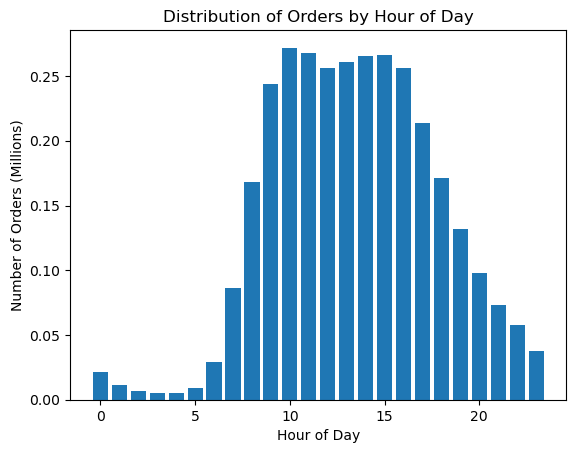

In [328]:
# bar chart for number of orders per hour of day 
order_dow_counts = grouped_df['order_hour_of_day'].value_counts() / 1e6
plt.bar(order_dow_counts.index, order_dow_counts.values, align='center')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders (Millions)')
plt.title('Distribution of Orders by Hour of Day')
plt.xticks(rotation=0)
plt.savefig('/Volumes/external_drive/Instacart/Analysis/order_hour.png', dpi=300)
plt.show()

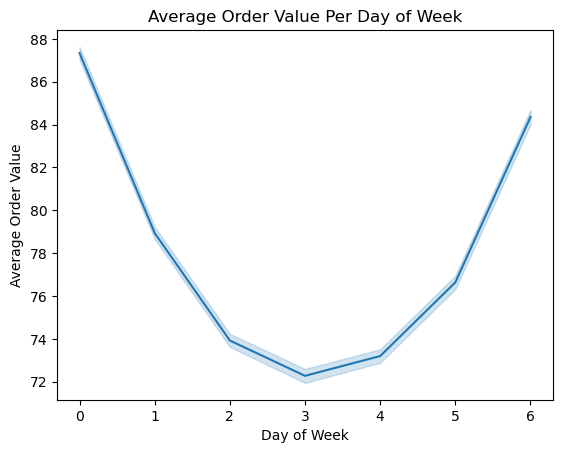

In [305]:
# creating line chart showing the average order value per day of week
np.random.seed(4)
dev = np.random.rand(len(grouped_df)) <= 0.7
big = grouped_df[dev]
small = grouped_df[~dev]
grouped_df_2 = small[['order_dow', 'prices']]
line_prices_dow = sns.lineplot(data=grouped_df_2, x='order_dow', y='prices')
line_prices_dow.set(xlabel='Day of Week', ylabel='Average Order Value')
line_prices_dow.set_title('Average Order Value Per Day of Week')
line_prices_dow.figure.savefig('/Volumes/external_drive/Instacart/Analysis/line_prices_dow.png', dpi=300)

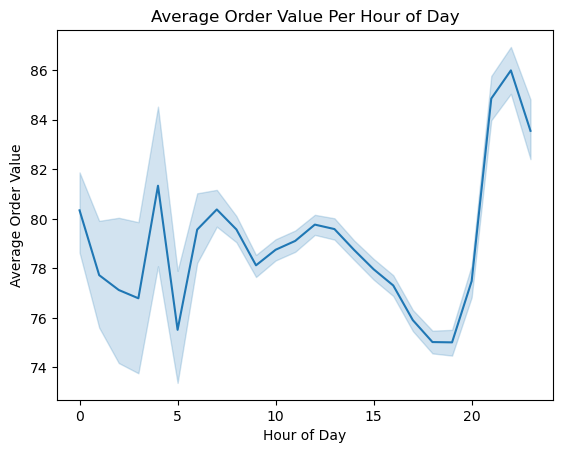

In [309]:
# creating line chart showing the average order value per hour of day
np.random.seed(4)
dev = np.random.rand(len(grouped_df)) <= 0.7
big = grouped_df[dev]
small = grouped_df[~dev]
grouped_df_3 = small[['order_hour_of_day', 'prices']]
line_prices_dow = sns.lineplot(data=grouped_df_3, x='order_hour_of_day', y='prices')
line_prices_dow.set(xlabel='Hour of Day', ylabel='Average Order Value')
line_prices_dow.set_title('Average Order Value Per Hour of Day')
line_prices_dow.figure.savefig('/Volumes/external_drive/Instacart/Analysis/line_prices_hour.png', dpi=300)